### UCI Credit Card dataset
#### Attribute Information:

##### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
##### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
##### X2: Gender (1 = male; 2 = female).
##### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
##### X4: Marital status (1 = married; 2 = single; 3 = others).
##### X5: Age (year).
##### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
##### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
##### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Genaralized Concepts For the Project.

### 1. Performing the necessary preprocessing of the Dataset.
### 2. Exploratary Data Analysis
### 3. Model Testing and Evaluation.
### 4. Finalizing Model for the Predictions of Defaulter.

In [1]:
import numpy as np  # Importing the NumPy library and renaming it to "np"
import pandas as pd  # Importing the Pandas library and renaming it to "pd"
import matplotlib.pyplot as plt  # Importing the Pyplot module from the Matplotlib library and renaming it to "plt"
import seaborn as sns  # Importing the Seaborn library and renaming it to "sns"
%matplotlib inline  

In [2]:
# reading the UCI Credit Card dataset from a CSV file using pandas
cc_df = pd.read_csv(r"C:\Users\niraj\Downloads\newdataset\UCI_Credit_Card.csv")

In [3]:
# checking few rows of the dataset
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# checking duplicate value in the cc_df DataFrame
cc_df.duplicated().sum()

0

In [6]:
cc_df.shape

(30000, 25)

In [7]:
# renaming the column 'default.payment.next.month' in the cc_df DataFrame to 'defaulter'
cc_df.rename({'default.payment.next.month':'defaulter'}, axis=1, inplace=True)

In [8]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
# dropping the 'ID' column from the cc_df DataFrame. 
cc_df.drop(columns=['ID'], axis=1, inplace=True)

# Exploratary Data Analysis

In [10]:
cc_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
cc_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [12]:
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
mar_dummies = pd.get_dummies(cc_df['MARRIAGE'], prefix = 'Maritalstatus')

In [15]:
edu_dummies = pd.get_dummies(cc_df['EDUCATION'], prefix = 'Edu')

In [16]:
cc_df_after_dummies = pd.concat([cc_df, mar_dummies, edu_dummies], axis=1)

In [17]:
cc_df_after_dummies.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Maritalstatus_1,Maritalstatus_2,Maritalstatus_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [18]:
cc_df_after_dummies.drop(columns=['EDUCATION','MARRIAGE'], axis=1, inplace=True)

In [19]:
cc_df_after_dummies.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Maritalstatus_1,Maritalstatus_2,Maritalstatus_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,1,0,0,0,0,1,0,0,0,0


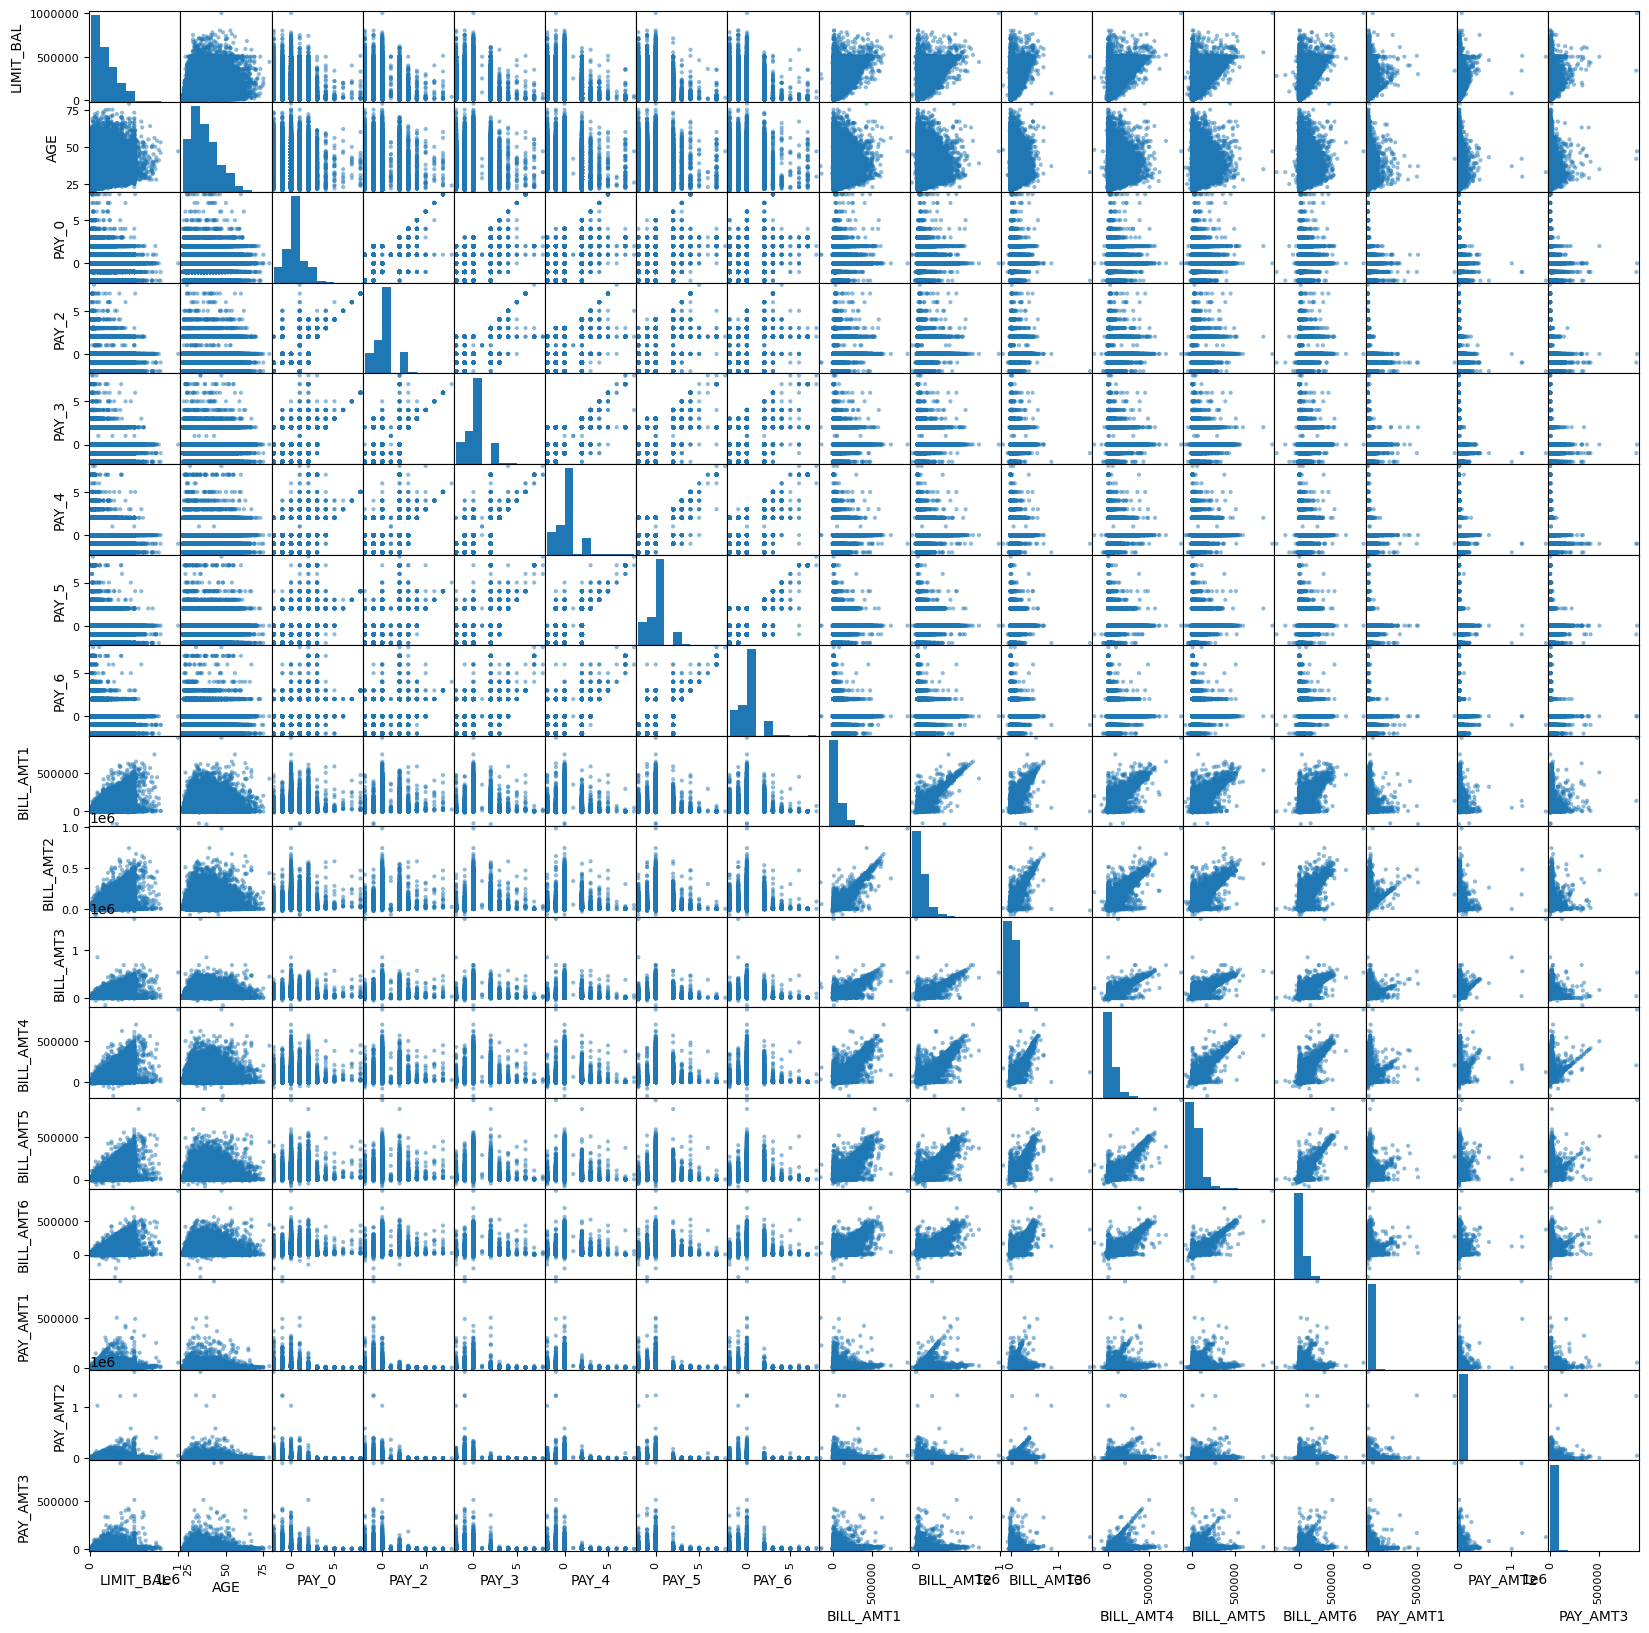

In [20]:
# Selecting the columns which we want to analyze
cols = ['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
        'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3']

# Create a matrix of scatter plots for the selected columns
pd.plotting.scatter_matrix(cc_df[cols], figsize=(20,20))
plt.show()

In [21]:
corr_matrix = cc_df.corr()

In [23]:
corr_matrix

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


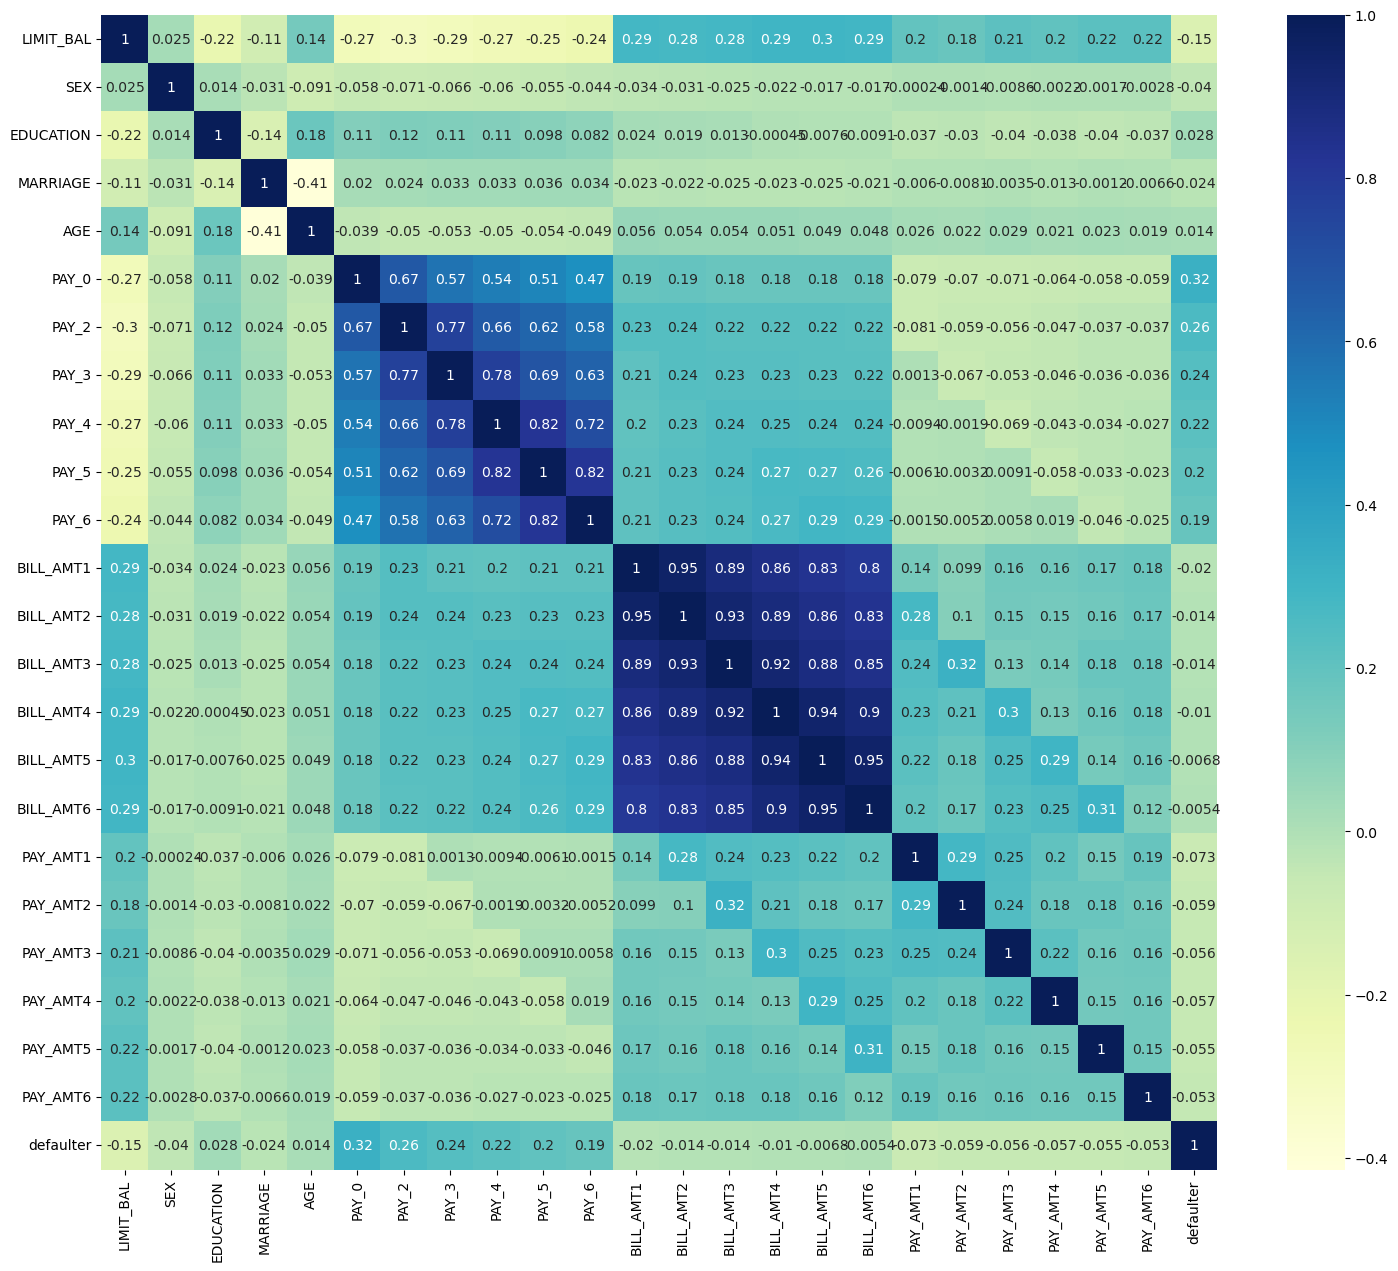

In [24]:
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

#### Based on the values in the table, it seems that the target variable "defaulter" is moderately negatively correlated with the variable "LIMIT_BAL" (-0.1535). This suggests that individuals with lower credit limits are more likely to default.

#### Other variables that show some correlation with "defaulter" include "PAY_0", "PAY_2", "PAY_3", "PAY_4", and "PAY_5", which are past payment statuses (-0.3248, -0.2636, -0.2353, -0.2166, and -0.2041, respectively). This indicates that individuals who have a history of delayed payments are more likely to default.

#### On the other hand, there are no strong correlations between "defaulter" and other demographic variables, such as "SEX", "EDUCATION", "MARRIAGE", and "AGE". However, it's worth noting that some of these variables have weak correlations with the other independent variables, which could still impact the performance of a predictive model.

In [25]:
# Print the variables with the highest correlation values
threshold = 0.7 # Set a threshold for the correlation value
high_corr_var = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            var_name = corr_matrix.columns[i]
            high_corr_var.append(var_name)
            print(f"{var_name} has a correlation value of {corr_matrix.iloc[i, j]} with {corr_matrix.columns[j]}")

# Remove duplicates from the list of high correlation variables
high_corr_var = list(set(high_corr_var))
print(f"The variables with high correlation values are: {', '.join(high_corr_var)}")

PAY_3 has a correlation value of 0.7665516829341017 with PAY_2
PAY_4 has a correlation value of 0.7773588733012726 with PAY_3
PAY_5 has a correlation value of 0.8198353114868158 with PAY_4
PAY_6 has a correlation value of 0.7164494815807845 with PAY_4
PAY_6 has a correlation value of 0.8169001604176753 with PAY_5
BILL_AMT2 has a correlation value of 0.9514836727518136 with BILL_AMT1
BILL_AMT3 has a correlation value of 0.8922785291271761 with BILL_AMT1
BILL_AMT3 has a correlation value of 0.9283262592714855 with BILL_AMT2
BILL_AMT4 has a correlation value of 0.8602721890293095 with BILL_AMT1
BILL_AMT4 has a correlation value of 0.8924822912577209 with BILL_AMT2
BILL_AMT4 has a correlation value of 0.9239694565909823 with BILL_AMT3
BILL_AMT5 has a correlation value of 0.8297786058330013 with BILL_AMT1
BILL_AMT5 has a correlation value of 0.859778307271445 with BILL_AMT2
BILL_AMT5 has a correlation value of 0.8839096973620155 with BILL_AMT3
BILL_AMT5 has a correlation value of 0.94013440

#### The variables with high correlation values are PAY_6, PAY_4, BILL_AMT4, BILL_AMT6, BILL_AMT3, BILL_AMT5, PAY_5, BILL_AMT2, and PAY_3. This suggests that these variables may be closely related and may have an impact on each other's values. For example, the value of PAY_4 may be a good predictor of the value of PAY_3, or the value of BILL_AMT4 may be a good predictor of the value of BILL_AMT5.

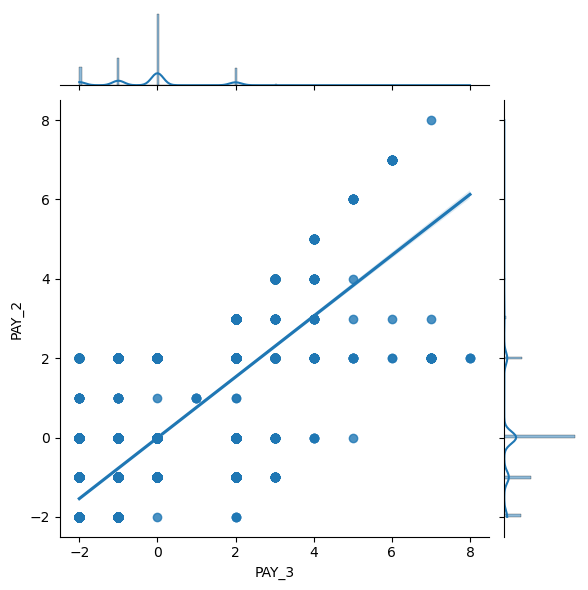

In [26]:
sns.jointplot(x='PAY_3',y='PAY_2',data=cc_df,kind='reg')

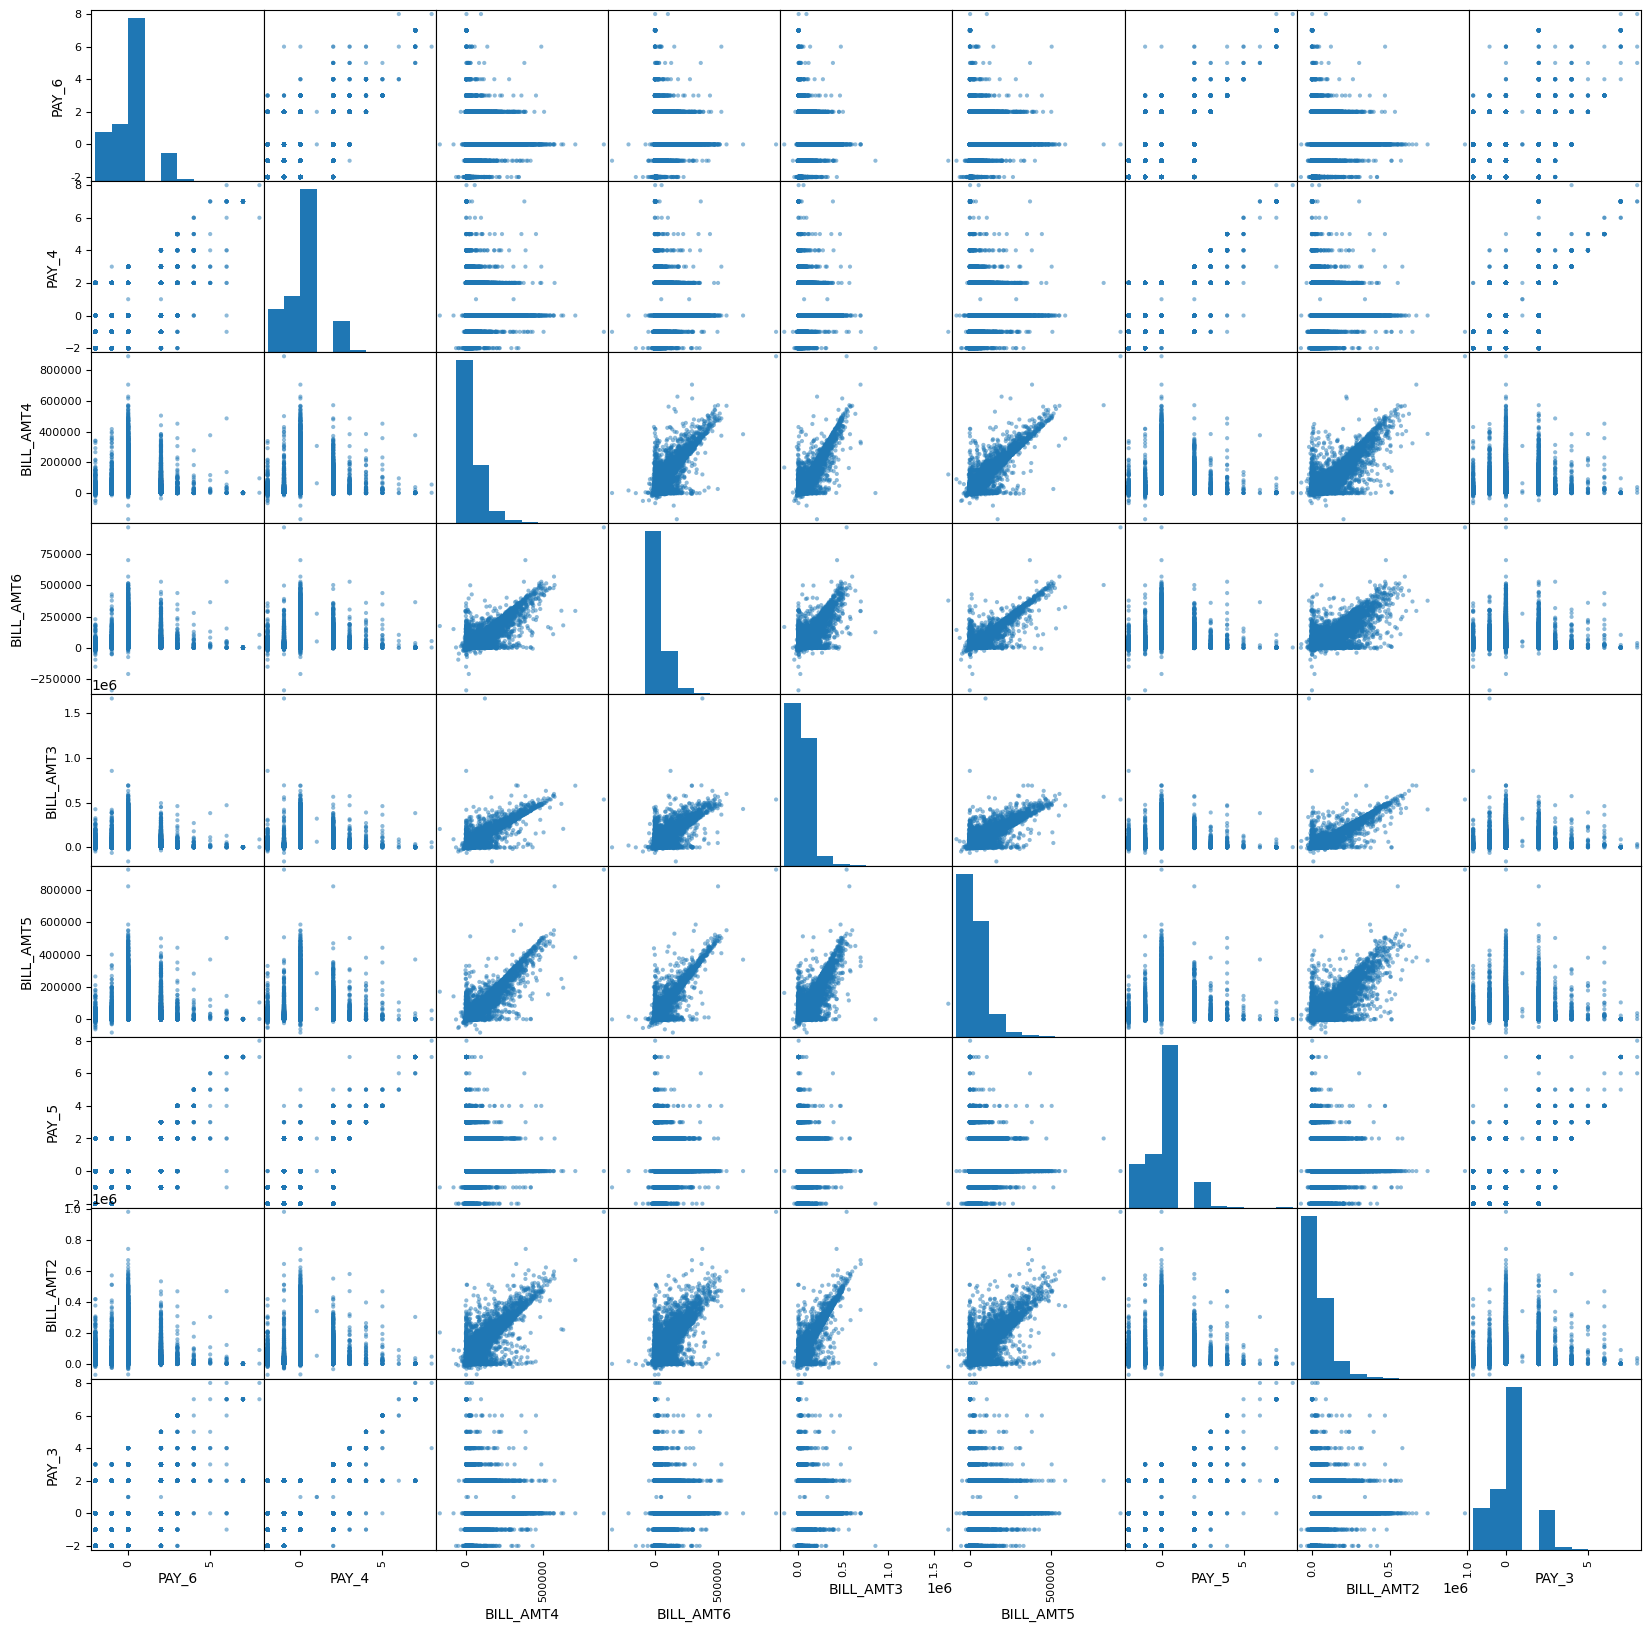

In [27]:
# Selecting the columns which we want to analyze
cols = ['PAY_6', 'PAY_4', 'BILL_AMT4', 'BILL_AMT6', 'BILL_AMT3', 'BILL_AMT5', 'PAY_5', 'BILL_AMT2', 'PAY_3']

# Create a matrix of scatter plots for the selected columns
pd.plotting.scatter_matrix(cc_df[cols], figsize=(20,20))
plt.show()

In [27]:
cc_df_after_dummies.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Maritalstatus_1,Maritalstatus_2,Maritalstatus_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,1,0,0,0,0,1,0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler
# Selecting specific columns to standardize
cols_to_standardize = ['LIMIT_BAL','SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
#Creating a StandardScaler object
scaler = StandardScaler()
# Applying standardization to selected columns
cc_df_after_dummies[cols_to_standardize] = scaler.fit_transform(cc_df_after_dummies[cols_to_standardize])
#cc_df_after_dummies = scaler.fit_transform(cc_df_after_dummies)

In [29]:
pd.set_option('display.max_columns', 33)

In [30]:
cc_df_after_dummies.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter,Maritalstatus_0,Maritalstatus_1,Maritalstatus_2,Maritalstatus_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,-1.136720,0.810161,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,0,1,0,0,0,0,1,0,0,0,0
1,-0.365981,0.810161,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,0,0,1,0,0,0,1,0,0,0,0
2,-0.597202,0.810161,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,0,0,1,0,0,0,1,0,0,0,0
3,-0.905498,0.810161,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.905498,-1.234323,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,0,1,0,0,0,0,1,0,0,0,0


In [31]:
cc_df_after_dummies.shape

(30000, 33)

In [32]:
cc_df_after_dummies.to_csv('CleanedCreditCard')

In [33]:
Credit_default_df = pd.read_csv('CleanedCreditCard')

In [34]:
Credit_default_df.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter,Maritalstatus_0,Maritalstatus_1,Maritalstatus_2,Maritalstatus_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,0,-1.136720,0.810161,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,...,-0.296801,-0.308063,-0.314136,-0.293382,1,0,1,0,0,0,0,1,0,0,0,0
1,1,-0.365981,0.810161,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,...,-0.240005,-0.244230,-0.314136,-0.180878,1,0,0,1,0,0,0,1,0,0,0,0
2,2,-0.597202,0.810161,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,...,-0.240005,-0.244230,-0.248683,-0.012122,0,0,0,1,0,0,0,1,0,0,0,0
3,3,-0.905498,0.810161,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,...,-0.228645,-0.237846,-0.244166,-0.237130,0,0,1,0,0,0,0,1,0,0,0,0
4,4,-0.905498,-1.234323,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,...,0.271165,0.266434,-0.269039,-0.255187,0,0,1,0,0,0,0,1,0,0,0,0


# Model Testing

### In the evaluation, we have discussed the classification report of both training and testing data. Producing classification reports for both the training and test datasets can give helpful information about how well the machine learning model is doing and helps direct the optimization procedure to get the best results.


In [35]:
Credit_default_df['defaulter'].value_counts()

0    23364
1     6636
Name: defaulter, dtype: int64

In [36]:
x = Credit_default_df.drop(['Unnamed: 0','defaulter'], axis=1)
y = Credit_default_df['defaulter']

In [37]:
# importing some functions from scikit-learn (sklearn) library and then using them to split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [39]:
# scaling the data using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
from sklearn.pipeline import make_pipeline
# creating a LogisticRegression object from scikit-learn (sklearn) library.
Lr = LogisticRegression()
pipe = make_pipeline(scaler, Lr)
#fit the model using the training data
pipe.fit(x_train,y_train)
#use model to make predictions on test data
x_test_pred = pipe.predict(x_test)
x_train_pred = pipe.predict(x_train)

In [41]:
classification_report = metrics.classification_report(y_test, x_test_pred)
classification_report1 =  metrics.classification_report(y_train, x_train_pred)

In [42]:
print('Classification Report for TrainData:', classification_report1)

Classification Report for TrainData:               precision    recall  f1-score   support

           0       0.82      0.97      0.89     18677
           1       0.72      0.25      0.37      5323

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.63     24000
weighted avg       0.80      0.81      0.77     24000



In [43]:
print('Classification Report for TestData:', classification_report)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



#### The classification report for both the training and test datasets are very similar, with the accuracy, precision, recall, and F1-score being almost identical. This indicates that the model is not overfitting to the training data and is performing similarly on unseen data.

#### The accuracy for both datasets is 0.81, which means that the model is able to correctly predict 81% of the credit card defaults. However, when we look at the precision and recall for the minority class (class 1, defaulters), we see that the precision is 0.72 for the training set and 0.70 for the test set, and the recall is 0.25 for the training set and 0.24 for the test set. This means that the model is not very good at identifying the defaulters, with a relatively low recall rate.

#### Overall, the classification report indicates that the logistic regression model is performing reasonably well, but there is definitely room for improvement, especially in identifying the defaulters.

# Performing HyperParameterTuning for LogisticRegression

In [44]:
# Defining the hyperparameter grid to search over
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}

# Scaling the training and testing data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Using GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(Lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Printing the best hyperparameters and the accuracy of the model
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.score(x_test_scaled, y_test))

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Va

Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Accuracy: 0.8113333333333334


Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Accuracy: 0.8113333333333334
#### This warning message  provides details about the cause of the failures. In this case, the failures are due to using penalty types (l1, elasticnet) that are not supported by solvers (newton-cg, lbfgs, sag). These solver algorithms only support l2 or no penalty (none).

In [45]:
# removing the penalty types l1 and elasticnet from param_grid 
# Defining the hyperparameter grid to search over again
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': [ 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}

# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Using GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(Lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Printing the best hyperparameters and the accuracy of the model
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.score(x_test_scaled, y_test))

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 71, in _check_solver
    raise ValueError("pena

Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Accuracy: 0.8113333333333334


### In conclusion, the hyperparameters {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'} performed the best with an accuracy of 0.8113333333333334 on the given dataset. 

## Applying DecisionTree 

In [46]:
# creating a LogisticRegression object from scikit-learn (sklearn) library.
dt = DecisionTreeClassifier()
pipe1 = make_pipeline(scaler, dt)
#fit the model using the training data
pipe1.fit(x_train,y_train)
#use model to make predictions on test data
x_test_pred1 = pipe1.predict(x_test)
x_train_pred1 = pipe1.predict(x_train)

In [47]:
# Evaluating the classification report of the model
classification_report_dt = metrics.classification_report(y_test, x_test_pred1)
classification_report1_dt =  metrics.classification_report(y_train, x_train_pred1)

In [48]:
print('Classification Report for TrainData:', classification_report1_dt)

Classification Report for TrainData:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18677
           1       1.00      1.00      1.00      5323

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [49]:
print('Classification Report for TestData:', classification_report_dt)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.37      0.40      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



### By using a decision tree classifier, we can see the stark contrast between the accuracy during training and accuracy during testing. The sole reason for this is because decision trees on unbalanced datasets have a tendency to favor the majority class since they divide the data into subsets to optimize information gain without accounting for the distribution of classes. As a result, the resultant tree may be heavily biased in favor of the majority class, which would reduce its ability to forecast the minority class.

### There are 23364 instances of class 0 and only 6,636 instances of class 1. This means that class 0 is overrepresented and class 1 is underrepresented, making it an imbalanced dataset.

### Hence, Therefore, we employed gradient booster since, among other things, it is an ensemble approach that combines a number of weak learners (in the case of gradient booster, decision trees) into a single strong learner. This can lessen the tendency for decision trees to favor the majority class in datasets that are unbalanced.



## HyperParameter Tuning of DecisionTree Classifier

In [92]:
# Defining the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Creating a decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Performing GridSearchCV
grid_searchDTC = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_searchDTC.fit(x_train_scaled, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_searchDTC.best_params_)

# Predicting using the best estimator
y_predDTC = grid_searchDTC.best_estimator_.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_predDTC))

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8208333333333333


In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predDTC))

Confusion Matrix:
 [[4452  235]
 [ 840  473]]


In [87]:
# Evaluating the classification report of the testing dataset of model
classification_reportDTC_test = metrics.classification_report(y_test, y_predDTC)

In [88]:
print('Classification Report for TestData:', classification_reportDTC_test)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [89]:
x_predDTC = grid_searchDTC.best_estimator_.predict(x_train)

In [90]:
# Evaluating the classification report of training dataset of the model
classification_report1_DTCtrain =  metrics.classification_report(y_train, x_predDTC)

In [91]:
print('Classification Report for TestData:', classification_report1_DTCtrain)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.84      0.95      0.89     18677
           1       0.69      0.37      0.48      5323

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000



### The DecisionTree Classifier's overall accuracy has risen by about 10% as a result of hyperparameter tuning. There is no overfitting concern since the precision value difference between training and testing has minimized.

### -----

## Applying Gradient Booster Algorthim 

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
# Creating the Gradient Boosting classifier object
clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
# combining multiple processing steps and a machine learning model into a single object that can be trained
pipe2 = make_pipeline(scaler, clf)
# Training the model on the training set
pipe2.fit(x_train, y_train)

# Predicting the labels for the testing set
y_pred_train_clf = pipe2.predict(x_train)
y_pred_test_clf = pipe2.predict(x_test)
# Evaluating the classification report of the model
classification_report_clf = metrics.classification_report(y_test, y_pred_test_clf)
classification_report1_clf =  metrics.classification_report(y_train, y_pred_train_clf)

In [74]:
print('Classification Report for TrainData:', classification_report1_clf)

Classification Report for TrainData:               precision    recall  f1-score   support

           0       0.84      0.95      0.90     18677
           1       0.70      0.38      0.49      5323

    accuracy                           0.83     24000
   macro avg       0.77      0.67      0.69     24000
weighted avg       0.81      0.83      0.81     24000



In [75]:
print('Classification Report for TestData:', classification_report_clf)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### The reports indicate that the model achieved an overall accuracy of 0.83 on the training dataset and 0.82 on the testing dataset. The precision for the majority class (0) is high on both datasets (0.84), indicating that the model is able to correctly identify non-defaulters with high accuracy. However, the precision for the minority class (1) is lower (0.70 on training data and 0.66 on testing data), indicating that the model struggles to correctly identify defaulters.
### Overall, the classification reports suggest that the model has a significant bias towards the majority class and struggles to identify the minority class.

## Applying Support Vector Machine

In [87]:
# creating a Supportvectormachine object from scikit-learn (sklearn) library.
svm = SVC()
pipe3 = make_pipeline(scaler, svm)
#fit the model using the training data
pipe3.fit(x_train,y_train)
#use model to make predictions on test data
x_test_pred3 = pipe3.predict(x_test)
x_train_pred3 = pipe3.predict(x_train)

In [88]:
classification_report_svm = metrics.classification_report(y_test, x_test_pred3)
classification_report1_svm =  metrics.classification_report(y_train, x_train_pred3)

In [92]:
print('Classification Report for TrainData:', classification_report1_svm)

Classification Report for TrainData:               precision    recall  f1-score   support

           0       0.84      0.96      0.90     18677
           1       0.72      0.35      0.47      5323

    accuracy                           0.83     24000
   macro avg       0.78      0.65      0.68     24000
weighted avg       0.81      0.83      0.80     24000



In [93]:
print('Classification Report for TestData:', classification_report_svm)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.68      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



### We can observe from comparing the classification reports for TrainData and TestData that class 1 has worse accuracy, recall, and f1-scores than class 0 in both instances. Due to the imbalance in the dataset, it is not surprising that the model is not performing well in predicting class 1, or the minority class. The ratings for class 0 are, however, noticeably higher, suggesting that the model is doing a better job of predicting the dominant class. A further sign that the model is overfitting the training data is that the accuracy score of the TrainData is greater than the accuracy score of the TestData. To balance the dataset and enhance the model's performance on the minority class, we must treat the imbalance dataset.


## plotting a graph to compare traing and testing accuracy of each Model 

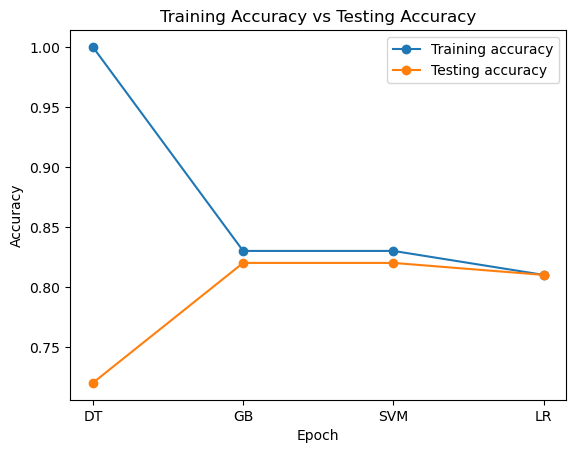

In [80]:
train_acc = [1.00, 0.83, 0.83, 0.81]
test_acc = [0.72, 0.82, 0.82, 0.81]

# Plotting the training and testing accuracy with dots
plt.plot(train_acc, 'o-', label='Training accuracy')
plt.plot(test_acc, 'o-', label='Testing accuracy')

# Adding title, labels and legend to the plot
plt.title('Training Accuracy vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adding names to the four points
plt.xticks(range(4), ['DT', 'GB', 'SVM', 'LR'])

# Show the plot
plt.show()

## Comparison of Accuracy via Graph Plotting

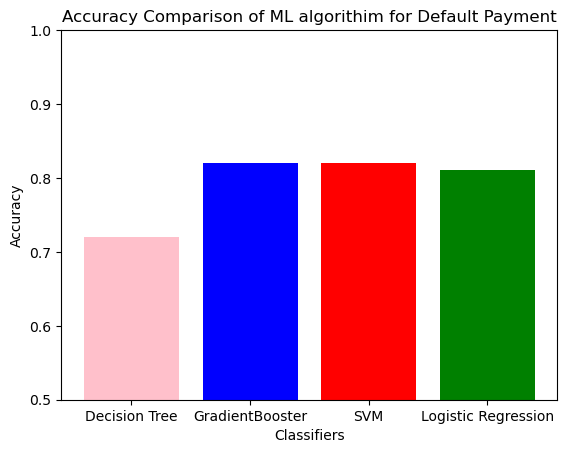

In [54]:
classifiers = ['Decision Tree', 'GradientBooster', 'SVM', 'Logistic Regression']
accuracies = [0.72, 0.82, 0.82,  0.811]
colors = ['pink', 'blue', 'red', 'green']

plt.bar(classifiers, accuracies, color=colors)
plt.ylim(0.5, 1.0)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML algorithim for Default Payment')
plt.show()

# Conclusion

## After examining the performance of each model, it is clear that Logistic Regression has the best overall accuracy (81%), as well as a high Precision and Recall value to forecast classes "0" and "1".

## However, after hyperparameter tuning for logistic regression and decision tree classifier, we acheived high accuracy as well better precison and recall value by DecisionTree classifier.